<a href="https://colab.research.google.com/github/priyanshu8493/Business_Review_Sentiment_Analysis/blob/main/customer_fdbck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import numpy as np
import csv


sentences = [ ]
labels = [ ]

data_path = '/content/sentiment-analysis.csv'


with open (data_path, 'r') as csv_file:
  reader = csv.reader(csv_file,delimiter = ',')

  for row in reader:

    line_str = row[0]   #considering one row as a whole as a string

    values = line_str.lower().split(',') # splitting the strings and getting the diff field values

    if len(values) > 1:    # filetering empty rows

      sentences.append(values[0].strip())
      sentiment = values[1].strip()
      if sentiment == 'positive':
        labels.append(1)
      else:
        labels.append(0)

sentences.pop(0)
labels.pop(0)


print(len(sentences))
print(len(labels))


96
96


In [189]:
# removing stopwords
from bs4 import BeautifulSoup
import string


table = str.maketrans('', '', string.punctuation)

stopwords_path = '/content/stopwords'

stopwords = []
corpas = []

with open(stopwords_path, 'r') as f:
  for line in f:
    stopwords.append(line.strip())

stopwords.append('im')

for item in sentences :
  item.replace(',', ' , ')
  item.replace ('-', ' - ')
  item.replace ("'", " ' ")
  item.replace ( "/", " / ")

  item = item.translate(table)

  soup = BeautifulSoup(item)
  item = soup.get_text()

  if item not in stopwords:
    corpas.append(item)
print(sentences)
print(corpas)


['"i love this product!"', '"the service was terrible."', '"this movie is amazing!"', '"i\'m so disappointed with their customer support."', '"just had the best meal of my life!"', '"the quality of this product is subpar."', '"i can\'t stop listening to this song. it\'s incredible!"', '"their website is so user-friendly. love it!"', '"i loved the movie! it was fantastic!"', '"the customer service was terrible."', '"this book made me feel inspired. highly recommended!"', '"i\'m extremely disappointed with their product quality."', '"just had the most amazing vacation! i can\'t wait to go back."', '"the food at this restaurant was awful. never going back again!"', '"i can\'t stop listening to this song. it\'s my new favorite!"', '"their website is so confusing and poorly designed."', '"i had an incredible experience at the theme park. so much fun!"', '"the product arrived damaged. very disappointed."', '"the concert was absolutely breathtaking. best performance ever!"', '"i had a terribl

In [190]:
# Tokenizing the corpas

from tensorflow.keras.preprocessing.text import Tokenizer

vocab_size = 10000

tokenizer = Tokenizer(num_words = vocab_size, oov_token = "<OOV>")
tokenizer.fit_on_texts(corpas)

word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'the': 2, 'this': 3, 'i': 4, 'was': 5, 'is': 6, 'a': 7, 'their': 8, 'at': 9, 'and': 10, 'to': 11, 'with': 12, 'customer': 13, 'of': 14, 'product': 15, 'service': 16, 'had': 17, 'im': 18, 'it': 19, 'terrible': 20, 'website': 21, 'disappointed': 22, 'food': 23, 'experience': 24, 'so': 25, 'me': 26, 'restaurant': 27, 'support': 28, 'my': 29, 'cant': 30, 'song': 31, 'quality': 32, 'its': 33, 'movie': 34, 'book': 35, 'amazing': 36, 'just': 37, 'incredible': 38, 'highly': 39, 'back': 40, 'love': 41, 'best': 42, 'stop': 43, 'listening': 44, 'recommended': 45, 'never': 46, 'confusing': 47, 'arrived': 48, 'hotel': 49, 'in': 50, 'userfriendly': 51, 'loved': 52, 'extremely': 53, 'most': 54, 'wait': 55, 'go': 56, 'an': 57, 'theme': 58, 'park': 59, 'much': 60, 'fun': 61, 'damaged': 62, 'concert': 63, 'absolutely': 64, 'store': 65, 'rude': 66, 'staff': 67, 'roller': 68, 'coaster': 69, 'ride': 70, 'ordered': 71, 'poor': 72, 'no': 73, 'resolution': 74, 'always': 75, 'puts': 76, 'good': 77

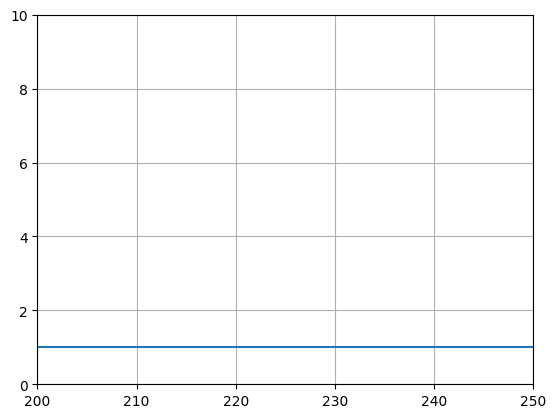

273


In [191]:
wc = tokenizer.word_counts
from collections import OrderedDict
import matplotlib.pyplot as plt


des_wc = OrderedDict((
    sorted( wc.items(), key = lambda x : x[1], reverse = True)
    ))

des_wc

xs = []
ys = []

curr_x = 1

for i in des_wc:
  xs.append(curr_x)
  ys.append(des_wc[i])
  curr_x +=1

plt.plot(xs,ys)
plt.grid()
plt.axis([200,250, 0,10])

plt.show()
print(len(xs))


In [206]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Embedding( vocab_size, 7 ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(7, return_sequences = True, dropout = 0.2 )),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(7, dropout = 0.2 )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(18, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


87


In [193]:
import numpy as np
import tensorflow as np


max_len = 87

corpas_sequence = tokenizer.texts_to_sequences(corpas)

padded_corpas_sequence = pad_sequences( corpas_sequence , maxlen = max_len, padding = 'post')

print(padded_corpas_sequence[0])









[ 4 41  3 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [194]:
import numpy as np

training_feature = np.array(padded_corpas_sequence)
training_labels = np.array(labels)


print(training_feature)
print(training_labels)


[[ 4 41  3 ...  0  0  0]
 [ 2 16  5 ...  0  0  0]
 [ 3 34  6 ...  0  0  0]
 ...
 [ 4 30 43 ...  0  0  0]
 [ 8 21  6 ...  0  0  0]
 [ 4 17 57 ...  0  0  0]]
[1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1
 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1]


In [207]:
model.fit(training_feature, training_labels, epochs = 50)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.4622 - loss: 0.7088
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5586 - loss: 0.7081
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5482 - loss: 0.7074
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5378 - loss: 0.7055
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5898 - loss: 0.7046
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5885 - loss: 0.7039
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5234 - loss: 0.7040
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5456 - loss: 0.7028
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5898 - loss: 0.7010
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.5221 - loss: 0.7033
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.5664 - loss: 0.6994
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.5586 - loss: 0.69

In [211]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

test_sentence = [
    "i had a terrible experience "
]

test_sequence = tokenizer.texts_to_sequences(test_sentence)

pad_test = pad_sequences( test_sequence , maxlen = max_len, padding = 'post')

test = np.array(pad_test)


classification = model.predict(test)
print(classification)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.0431421]]
